# Digit Recognizer

Similar to the Titanic project, the Digit Recognizer Competition on Kaggle is meant for learning about computer vision. I've noticed that many of the submissions for this project use CNN. Due to SuperDataScience on Udemy, I am familiar with some common and useful machine learning models however at the start of this project, I know very little about Neural Networks and Deep Learning. My hope for this project is to gain some knowledge into how to and why you should set up Neural Networks in a certain way to create a model. 
Through this second project of mine, I hope to learn and clarify information on neural networks and use some new tools like keras. 

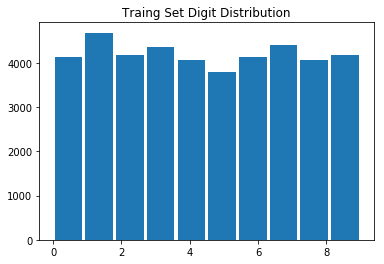

y_train Summary


count    42000.000000
mean         4.456643
std          2.887730
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: label, dtype: float64

In [3]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
# Determine which keras tools you want to use

# Load data
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

x_train = df_train.iloc[:,1:]
y_train = df_train['label']

# Verify data is valid (should be, coming from Kaggle)
plt.hist(y_train, rwidth = 0.9)
plt.title("Traing Set Digit Distribution")
plt.show()
print("y_train Summary")
y_train.describe()

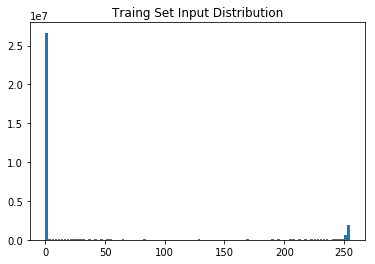

x_train Summary


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
# Examine how data looks
x_train_array = x_train.to_numpy().flatten()
plt.hist(x_train_array, rwidth = 0.9, bins=100)
plt.title("Traing Set Input Distribution")
plt.show()
print("x_train Summary")
x_train.describe()

Clearly, the input has a lot of zero values, where 0 indicates the abscence of writing in a visual representation of drawing these digits. With help from Yassine Ghouzam's Kaggle kernel (https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6), let's visualize what some of these inputs actually look like. 

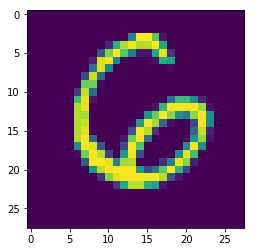

In [28]:
# Visualize input

# calling it X_train since each set of imput will be an input matrix (denoted X) as oppose to the vector of inputs x
# .reshape(-1) has the same effect as .flatten() seen above - I didn't specify reshape(num_cols, -1) so the default in a sense
# is to flatten the np.array. It then reshapes it into 28x28x1 matrices, one for each picture input
X_train = x_train.to_numpy().reshape(-1,28,28,1)

# Try running this with (-1,28,28) and you'll notice
# you get a 1xNumber_of_input_picturesx28x28 which is not as easy a format to deal with

# Our summary of y_train showed 42000 results in this training set
num_digs = 42000
# Randomly show an image of a digit
plt.imshow(X_train[np.random.randint(num_digs)][:,:,0])

Next, I'll be constructing my Convolutional Neural Network using Keras.

After reading through a number of articles, it seems that there is no true proven, systematic way you should go about creating your CNN. Through looking at what are commonly successful approaches of others, using intuition and some guessing, a good model can be developed. While I'm sure there's more complexity to it, this seems to be the general approach. Since this is a fairly standard problem with a lot of data, I should not need to try out a large number of experiments with the number of layers, nodes, etc. I will be using 2D filters and Pooling layers in order to generate a greater number of potentially meaningful inputs and to grab the important details of those layers through pooling. 

In [ ]:
# Examine CNN
# Write down what you've learned about constructing ANN

# construct it using keras
model = Sequential()
model.add(Conv2D(28, kernel_size=4,
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Dense(56, activation='relu'))
model.add(Conv2D(28, kernel_size=4,
                 activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, kernel_size=2,
                 activation='relu'))
model.add(Flatten())
model.add(Dense(num_category, activation='softmax'))



# validation using train/test split
# examine scores and some incorrect results - is it hard to tell what digit?

# Next steps:
# follow along Yassine Ghouzam's Kaggle Kernel with data augmentation if feeling adventurous
# examine improvement in the model after augmentation

# Submission & Conclusion
#sample_submission = pd.read_csv('sample_submission.csv')